In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
import collections
import numpy as np

sys.path.append("/private/home/alexandrerame/domainbedv2/")
sys.path.append("/private/home/alexandrerame/slurmconfig/notebook/data")

In [3]:
from data.terra_ood_iid import l as lterra
from oodiidacc.home_ood_iid import l as lhome

ModuleNotFoundError: No module named 'data'

In [7]:
from oodiidacc.home_ood_iid_d6 import l as lhomed6
from oodiidacc.home_ood_iid_dn import l as lhomednb
from oodiidacc.lthp_home_dn_wip import l as lhomednv2
from oodiidacc.oodiid_home0123_1104 import l as lhome0123

In [32]:
import numpy as np
import scipy
from scipy import stats
import matplotlib.pyplot as plt
from matplotlib import cm

MIN_STEP=4999
MAX_STEP=5001
def plot_slopes_c(l, label, with_stats=False, ax=None, color=None):
    iids = [ll["val_acc"] for ll in l]
    oods = [ll["test_acc"] for ll in l]
    if color is None:
        colormap = cm.rainbow(np.linspace(0, 1, MAX_STEP-MIN_STEP))
        color = [colormap[ll["step"]-MIN_STEP] for ll in l]
    title = label
    if with_stats:
        outs = stats.linregress(iids, oods)
        names = ["slope", "intercept", "r_value", "p_value", "std_err"]
        dict_out = {key: "{:.4f}".format(value) for key, value in zip(names, outs)}
        title += " " + dict_out["r_value"]
    else:
        dict_out = {}
    if ax is None:
        fig, ax = plt.subplots()
        ax.set_title(title, fontsize="large")
        
    ax.scatter(iids, oods, color=color, label=label)
    ax.set_xlabel("IID", fontsize="large")
    #plt.ylim([0.52, 0.71])
    #plt.xlim([0.77, 0.87])
    ax.set_ylabel("OOD", fontsize="large")
    
    return dict_out


plt.rcParams["figure.figsize"] = (6, 4)

# Full results for OfficeHome Domain Art

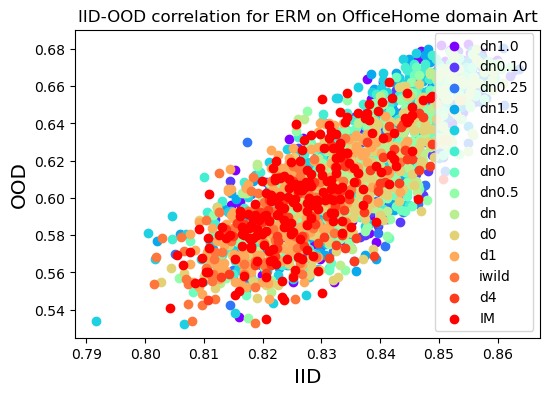

In [24]:
l = {**lhomednb, **lhomednv2}
l["home0_erm_lp_IM_0926"] = lhomed6["home0_erm_lp_0926"]
keys = l.keys()
dict_out = collections.defaultdict(list)
fig, ax = plt.subplots()
colormap = cm.rainbow(np.linspace(0, 1, len(keys)))
for test_env in [0]:
    for i, key in enumerate(keys):
        shortkey = "_".join([c for c in key.split("_")[2:] if c not in ["lp", "0926"]])
        ll = [line for line in l[key] if line.get("test_env", test_env) == test_env and line["step"] > 4000]
        plot_slopes_c(ll, label=shortkey, ax=ax, color=colormap[i])
ax.set_title("IID-OOD correlation for ERM on OfficeHome domain Art")
ax.legend(loc="lower right")

# Other domains for OfficeHome

In [10]:
keys

dict_keys(['home0_twama_d6_lpl4w0a_0926', 'home0_twama_d6_lpl4w0_0926', 'home_twama_dn_lp_0926', 'home_twama_d0_lp_0926', 'home_twama_d1_lp_0926', 'home_twama_d4_lp_0926', 'home_twama_iwild_lp_0926', 'home1_twama_d6_lpl4w0a_0926', 'home1_twama_d6_lpl4w0_0926', 'home2_twama_d6_lpl4w0a_0926', 'home2_twama_d6_lpl4w0_0926', 'home3_twama_d6_lpl4w0a_0926', 'home3_twama_d6_lpl4w0_0926'])

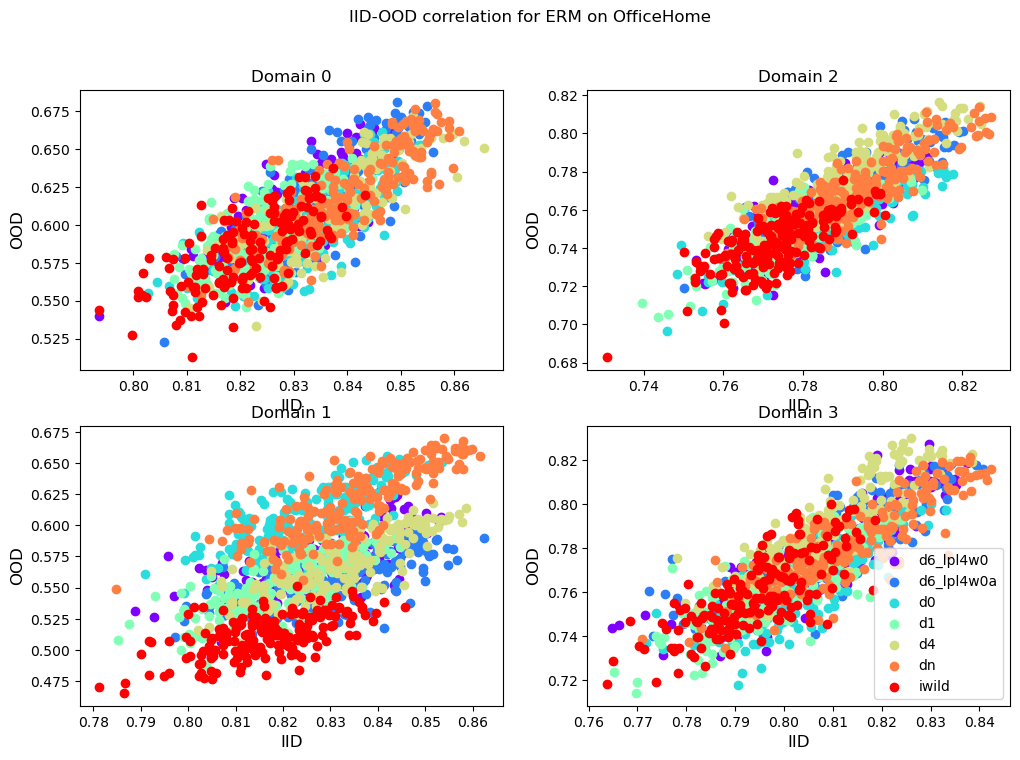

In [33]:
plt.rcParams["figure.figsize"] = (12, 8)
l = lhome0123
keys = l.keys()
dict_out = collections.defaultdict(list)

fig, axes = plt.subplots(2, 2)
for test_env in [0, 1, 2, 3]:
    ax = axes[test_env %2][test_env // 2]
    keys = sorted([key for key in l.keys() if key.startswith("home_") or key.startswith(f"home{test_env}_")])
    colormap = cm.rainbow(np.linspace(0, 1, len(keys)))

    for i, key in enumerate(keys):
        if test_env == 3:
            shortkey = "_".join([c for c in key.split("_")[2:] if c not in ["lp", "0926"]])
        else:
            shortkey = None
        ll = [line for line in l[key] if line.get("test_env", test_env) == test_env and line["step"] > 4000]
        if len(ll) ==0:
            print(f"Skip {shortkey} for test_env {test_env}")
        else:
            plot_slopes_c(ll, label=shortkey, ax=ax, color=colormap[i])
    ax.set_title(f"Domain {test_env}")
    if test_env == 3:
        ax.legend(loc="lower right")
fig.suptitle(f"IID-OOD correlation for ERM on OfficeHome")
fig.show()

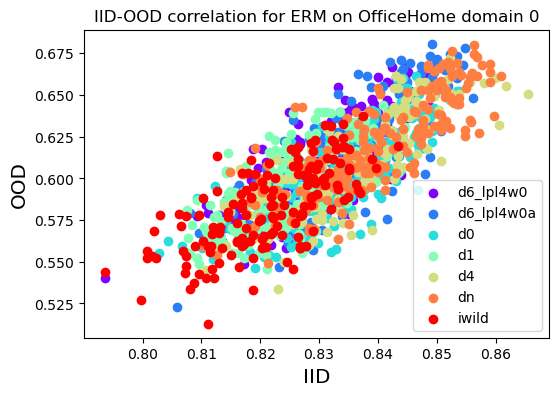

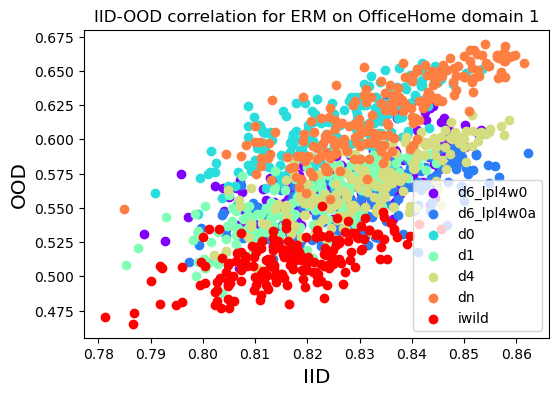

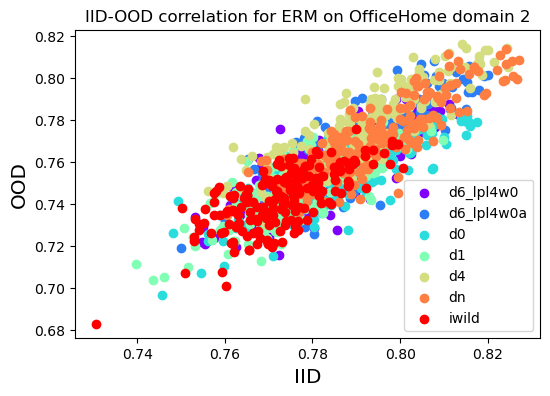

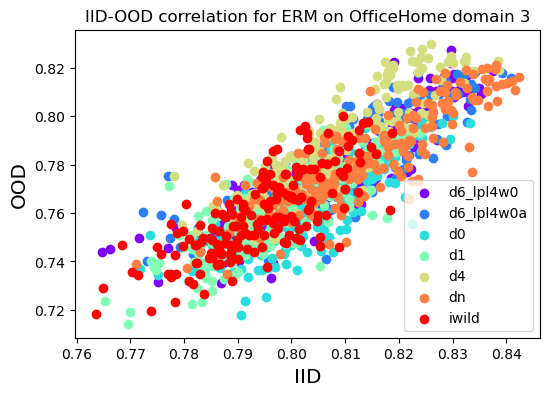

In [13]:

l = lhome0123
keys = l.keys()
dict_out = collections.defaultdict(list)


for test_env in [0, 1, 2, 3]:
    keys = sorted([key for key in l.keys() if key.startswith("home_") or key.startswith(f"home{test_env}_")])
    colormap = cm.rainbow(np.linspace(0, 1, len(keys)))
    fig = plt.figure()
    for i, key in enumerate(keys):
        shortkey = "_".join([c for c in key.split("_")[2:] if c not in ["lp", "0926"]])
        ll = [line for line in l[key] if line.get("test_env", test_env) == test_env and line["step"] > 4000]
        if len(ll) ==0:
            print(f"Skip {shortkey} for test_env {test_env}")
        else:
            plot_slopes_c(ll, label=shortkey, fig=fig, color=colormap[i])
    plt.title(f"IID-OOD correlation for ERM on OfficeHome domain {test_env}")
    plt.legend(loc="lower right")
    plt.show()

In [ ]:
dict_out = defaultdict(list)
for test_env in [0]:
    plt.show()
    print(test_env)
    for key in sorted(l.keys(), key=lambda x:x.split("_dn")[1].split("_")):
        if "lpl4w0a_i" in key or "lpl4w0_i" in key:
            if key.startswith("terra" + str(test_env)):
                plt.show()
                print(key)
                short_key = "_".join(key.split("_")[1:])
                dict_out[short_key].append(plot_slopes_c(l[key], label=key))